<a href="https://colab.research.google.com/github/Yospy/Predicting-Anime-Genre-based-on-Synopsis./blob/main/Predicting_Anime_Genre_based_on_Synopsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text 

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *

In [61]:
df = pd.read_csv('/content/animes.csv')
df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [62]:
len(df.title.unique())

16214

In [63]:
df1 = df[['synopsis','genre']]
df1.head()

,synopsis,genre
0,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun..."
1,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun..."
2,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F..."
3,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ..."
4,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']"


In [64]:
df1.isnull().sum()

synopsis    975
genre         0
dtype: int64

In [65]:
df1.dropna(subset=['synopsis'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [66]:
df1.isnull().sum()

synopsis    0
genre       0
dtype: int64

In [67]:
df1.head()

,synopsis,genre
0,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun..."
1,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun..."
2,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F..."
3,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ..."
4,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']"


In [68]:
df1.genre.unique()

array(["['Comedy', 'Sports', 'Drama', 'School', 'Shounen']",
       "['Drama', 'Music', 'Romance', 'School', 'Shounen']",
       "['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']", ...,
       "['Sci-Fi', 'Mystery', 'Drama', 'Mecha', 'School']",
       "['Sports', 'Drama', 'Shounen']",
       "['Music', 'Romance', 'Super Power', 'Supernatural']"],
      dtype=object)

# Extracting genre from series text and converting into a comprehensible list
# Creating dictionary containing all the unique genres

In [69]:
from pprint import pprint
from collections import defaultdict
hash_map = defaultdict(lambda: 0)

genrelist = []

for text in df1['genre']:
  templist = text[2:len(text)-2].split("', '")
  for i in range(len(templist)):
    if templist[i] == '':
      templist.pop(i)
      break

  genrelist.append(templist)
  for j in templist:
    hash_map[j] += 1


df1['genrelist'] = genrelist

pprint(len(hash_map))
pprint(hash_map)

43
defaultdict(<function <lambda> at 0x7ff4bbf24710>,
            {'Action': 4034,
             'Adventure': 3036,
             'Cars': 128,
             'Comedy': 6186,
             'Dementia': 405,
             'Demons': 577,
             'Drama': 2933,
             'Ecchi': 784,
             'Fantasy': 3259,
             'Game': 380,
             'Harem': 423,
             'Hentai': 2328,
             'Historical': 1164,
             'Horror': 505,
             'Josei': 115,
             'Kids': 2354,
             'Magic': 1126,
             'Martial Arts': 397,
             'Mecha': 1146,
             'Military': 651,
             'Music': 1945,
             'Mystery': 849,
             'Parody': 680,
             'Police': 296,
             'Psychological': 412,
             'Romance': 2121,
             'Samurai': 230,
             'School': 1853,
             'Sci-Fi': 2731,
             'Seinen': 963,
             'Shoujo': 774,
             'Shoujo Ai': 84,
             'Shoun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [70]:
df1.head()

,synopsis,genre,genrelist
0,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","[Comedy, Sports, Drama, School, Shounen]"
1,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","[Drama, Music, Romance, School, Shounen]"
2,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","[Sci-Fi, Adventure, Mystery, Drama, Fantasy]"
3,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","[Action, Military, Adventure, Comedy, Drama, M..."
4,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","[Action, Mystery, Supernatural, Vampire]"


In [71]:
df1.drop(['genre'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
df1.head()

,synopsis,genrelist
0,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]"
1,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]"
2,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]"
3,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M..."
4,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]"


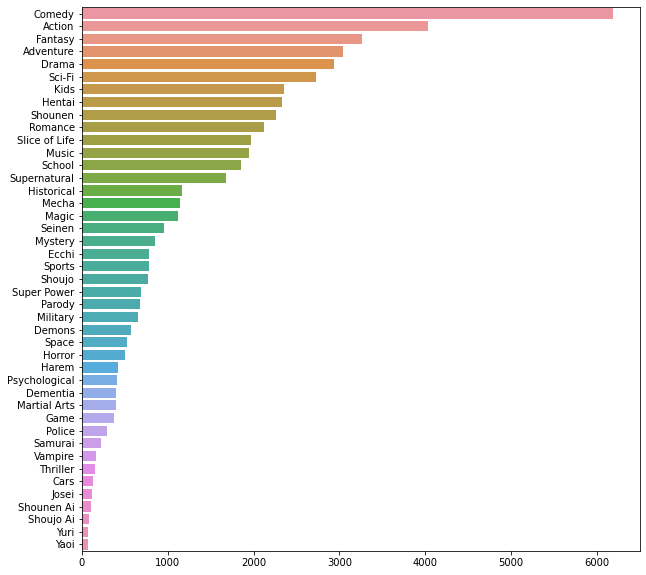

In [73]:
temp = list(hash_map.items())
temp.sort(key=lambda x: x[1],reverse=True)
y,x = [temp[i][0] for i in range(len(temp))], [temp[i][1] for i in range(len(temp))]
import seaborn as sn
plt.figure(figsize=(10,10))
sn.barplot(x=x,y=y)

In [74]:
df1.head()

,synopsis,genrelist
0,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]"
1,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]"
2,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]"
3,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M..."
4,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]"


# Text Preprocessing


In [75]:
from sklearn.preprocessing import MultiLabelBinarizer
normal = MultiLabelBinarizer()
y = normal.fit_transform(df1['genrelist'])
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1['synopsis'],y,test_size=0.2,shuffle=True)

In [77]:
X_train

3363     Gamba, a town mouse with a brave, adventurous ...
437      Tomoya Okazaki is a delinquent who finds life ...
5959     Shikidouji, the illustrator of Shoji Gatoh's  ...
18670    A movie finale to Munto, a director's cut of t...
17172    In the late 21st century, humankind came under...
                               ...                        
3069     Join this band of femme fatales as they sacrif...
10325    Yuu Haruna just moved into town and loves to u...
13592    Music video for Ruby by GREAT3. From the album...
15303    When an extraterrestrial organism known as "Sa...
12227           Short corners released exclusively on DVD.
Name: synopsis, Length: 14668, dtype: object

In [78]:
bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

In [79]:
def get_sentence_encoder(sentences):
  preprocess = bert_preprocess(sentences)
  return bert_model(preprocess)['pooled_output']

In [80]:
get_sentence_encoder(['Yash is a mad ass',"ahh shit"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.69555235, -0.2541849 ,  0.6425888 , ...,  0.49627337,
        -0.4975744 ,  0.7456868 ],
       [-0.90512884, -0.26616094, -0.22332683, ..., -0.15697193,
        -0.61399096,  0.8996454 ]], dtype=float32)>

# BERT Layers

In [81]:
inputs = tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocess_t = bert_preprocess(inputs)
output = bert_model(preprocess_t)

# Building a neural network

In [82]:
n = tf.keras.layers.Dropout(0.2,name='dropout')(output['pooled_output'])
n = tf.keras.layers.Dense(43,activation='sigmoid',name='output')(n)

In [83]:
model = tf.keras.Model(inputs=[inputs],outputs=[n])

In [84]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_5 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [85]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [86]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
459/459 [==============================] - 160s 330ms/step - loss: 0.2201 - accuracy: 0.9294 - precision: 0.2946 - recall: 0.0323
Epoch 2/5
459/459 [==============================] - 151s 329ms/step - loss: 0.2053 - accuracy: 0.9329 - precision: 0.5342 - recall: 0.0493
Epoch 3/5
459/459 [==============================] - 151s 329ms/step - loss: 0.2002 - accuracy: 0.9337 - precision: 0.5850 - recall: 0.0650
Epoch 4/5
459/459 [==============================] - 151s 329ms/step - loss: 0.1970 - accuracy: 0.9341 - precision: 0.5981 - recall: 0.0774
Epoch 5/5
459/459 [==============================] - 150s 328ms/step - loss: 0.1953 - accuracy: 0.9344 - precision: 0.5997 - recall: 0.0888


In [88]:
y_pred = model.predict(X_test)

115/115 [==============================] - 38s 328ms/step


In [90]:
y_pred

array([[0.04487122, 0.02498683, 0.0032927 , ..., 0.00405457, 0.00930239,
        0.00370581],
       [0.10633884, 0.0522188 , 0.00174653, ..., 0.00671501, 0.00225542,
        0.00178814],
       [0.11561523, 0.05426727, 0.00658972, ..., 0.00546817, 0.00499542,
        0.0037546 ],
       ...,
       [0.05541386, 0.07839797, 0.00362828, ..., 0.00517919, 0.0173423 ,
        0.0027457 ],
       [0.10747105, 0.03119583, 0.00229264, ..., 0.0056625 , 0.00297803,
        0.00139157],
       [0.10320739, 0.05485486, 0.00290546, ..., 0.00458133, 0.00223679,
        0.00139849]], dtype=float32)

In [103]:
y_pred = around(y_pred)

In [104]:
predicted = [normal.inverse_transform(y_pred)]

In [105]:
predicted

[[('Hentai',),
  (),
  (),
  (),
  ('Comedy',),
  ('Action', 'Sci-Fi'),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  ('Comedy',),
  (),
  (),
  (),
  (),
  ('Comedy',),
  (),
  (),
  ('Music',),
  (),
  (),
  (),
  ('Music',),
  (),
  (),
  (),
  (),
  (),
  ('Hentai',),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  ('Comedy',),
  (),
  (),
  ('Music',),
  (),
  (),
  (),
  (),
  (),
  ('Music',),
  ('Action',),
  ('Comedy',),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  ('Music',),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  ('Music',),
  ('Music',),
  (),
  (),
  (),
  ('Hentai',),
  ('Comedy',),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  ('Comedy',),
  (),
  (),
  ('Comedy',),
  (),
  (),
  (),
  (),
  (),
  ('Kids',),
  (),
  (),
  ('Action',),
  (),
  (),
  (),
  (),
  (),
  (),
  ('Action', 'Adventure', 'Sci-Fi'),
  (),
  (),
  (),
  (),
  ('Comedy',),
  (),
  (),
  ('Comedy',),
  (),
  (),
  (),
  (),
  (),
  (),
  (),
  (